In [43]:
from pathlib import Path
from copy import deepcopy
import json
import numpy as np 
import matplotlib.pyplot as plt  

In [7]:
data_dir = Path('../data/mathoverflow')
with open(data_dir / 'mathoverflow_statements.json') as json_file: 
    data = json.load(json_file)


In [223]:
# Back-of-the-envelope bins by eyeing the score summary for MathOverflow
score_bin_legend = ['<0', '0', '1', '2-4', '5-9', '10-49', '50-99', '100-199', '>200']
def score_to_bin(score):
    s = int(score)
    if s<0:
        this_bin = 0            
    elif s==0:
        this_bin = 1
    elif s==1:
        this_bin = 2
    elif s<5:
        this_bin = 3
    elif s<10:
        this_bin = 4
    elif s<50:
        this_bin = 5
    elif s<100:
        this_bin = 6
    elif s<200:
        this_bin = 7
    else:
        this_bin = 8
    return this_bin

In [247]:
label_summary = {'abstract': 0, 'proposition': 0, 'introduction': 0, 'remark': 0, 'problem': 0,
                 'example': 0, 'acknowledgement': 0, 'conclusion': 0, 'proof': 0, 'definition': 0, 'keywords': 0,
                 'result': 0, 'related_work': 0}
score_summary = {}
confidence_summary = {'0.1':0, '0.2':0, '0.3':0, '0.4':0, '0.5':0, '0.6':0, '0.7':0, '0.8':0, '0.9':0}
q_label_summary = deepcopy(label_summary)
a_label_summary = deepcopy(label_summary)
q_confidence_summary = deepcopy(confidence_summary)
a_confidence_summary = deepcopy(confidence_summary)

conf_label_breakdown = {'0.1': deepcopy(label_summary),
                        '0.2': deepcopy(label_summary), 
                        '0.3': deepcopy(label_summary),
                        '0.4': deepcopy(label_summary),
                        '0.5': deepcopy(label_summary),
                        '0.6': deepcopy(label_summary),
                        '0.7': deepcopy(label_summary),
                        '0.8': deepcopy(label_summary),
                        '0.9': deepcopy(label_summary)}
score_label_breakdown = deepcopy(label_summary)
for k in score_label_breakdown.keys():
    score_label_breakdown[k] = {score_bin_legend[i]:0 for i in range(0,len(score_bin_legend))}
print("Total data entries: ",len(data))
question_count = 0
answer_count = 0
for d in data:
    score_bin = score_to_bin(d['score'])
    score_summary[score_bin] = score_summary.get(score_bin,0)+1
    label = d['statement_label']
    label_summary[label] += 1
    confidence = d['statement_confidence'][0:3]
    confidence_summary[confidence] += 1
    conf_label_breakdown[confidence][label] += 1
    score_label_breakdown[label][score_bin_legend[score_bin]] += 1
    if d['type_id'] == '1':
        question_count += 1
        q_label_summary[label] += 1
        q_confidence_summary[confidence] += 1
    elif d['type_id'] == '2':
        answer_count += 1
        a_label_summary[label] += 1
        a_confidence_summary[confidence] += 1
print("Questions: %d" % question_count)
print("Answers: %d" % answer_count)

Total data entries:  266441
Questions: 113860
Answers: 152581


In [291]:
# example use:
# bar_chart(label_summary,'statement class','frequency',
#          'Statement Classes of MathOverflow Q&A Posts')
def bar_chart(data, xlabel, ylabel, title):
    keys = list(data.keys()) 
    values = list(data.values()) 
    
    fig = plt.figure(figsize = (16, 8))

    plt.bar(keys, values, width = 0.4) 
    plt.xticks(rotation=45)
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(title) 
    plt.show()
    
def bar_chart_subfigs(collection, legends, xlabel, ylabel, title, increment_colors=False,legend_outside=False):
    fig = plt.subplots(figsize = (16, 8))
    xticks = collection[0].keys()
    ind = np.arange(len(xticks))  
    inc_hex_color_scale = [
        '#738C84','#669988','#59A68C','#4DB290','#40BF95','#33CC99','#26D99D','#19E6A1','#0DF2A6','#00FFAA']
        # '#738C7B','#669977','#59A673','#4DB26F','#40BF6A','#33CC66','#26D962','#19E65E','#0DF259','#00FF55']
    contrast_hex_color_scale = ['#e6194b', '#3cb44b', '#f58231', '#4363d8', '#ffe119', '#911eb4', '#46f0f0',
                                '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',
                                '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff',
                                '#000000']

    width = 0.4
    subplots = []
    prev = []
    for (index,subset) in enumerate(collection):
        values = list(subset.values())
        if index>0:
            this_bottom+=prev
        else:
            this_bottom=np.zeros(len(values))
        if increment_colors:
            this_color=inc_hex_color_scale[index]
        else:
            this_color=contrast_hex_color_scale[index]
        prev = values
        subplots.append(plt.bar(ind, values, width, bottom=this_bottom, color=this_color))
        
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ind, xticks)
    if legend_outside:
        plt.legend([s[0] for s in subplots], legends, bbox_to_anchor=(1.02,1), loc="upper left")
    else:
        plt.legend([s[0] for s in subplots], legends)
    plt.title(title)
    plt.show()

    
    

# Confidence per Statement Class

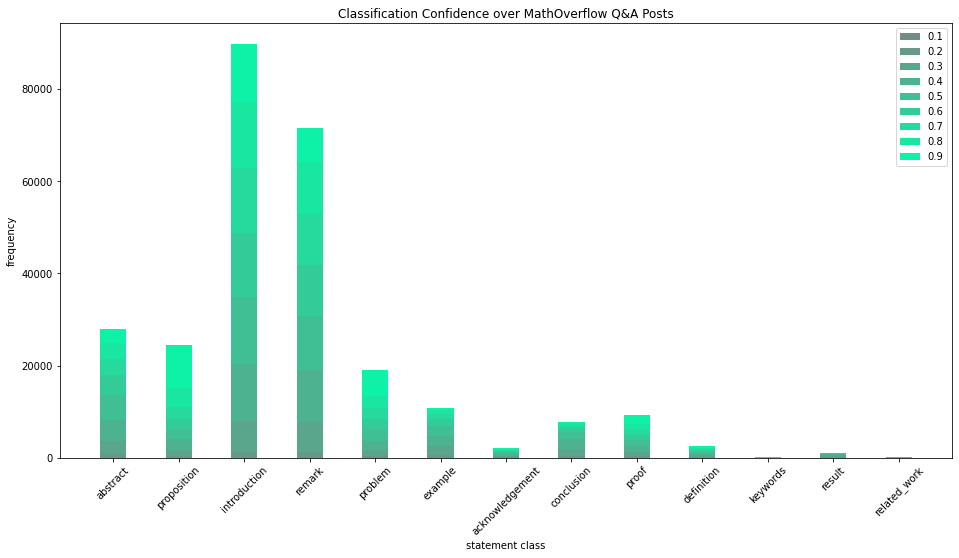

In [292]:
bar_chart_subfigs(list(conf_label_breakdown.values()), conf_label_breakdown.keys(),
                 "statement class", "frequency", "Classification Confidence over MathOverflow Q&A Posts", 
                  increment_colors=True)

# Classification by Post Type

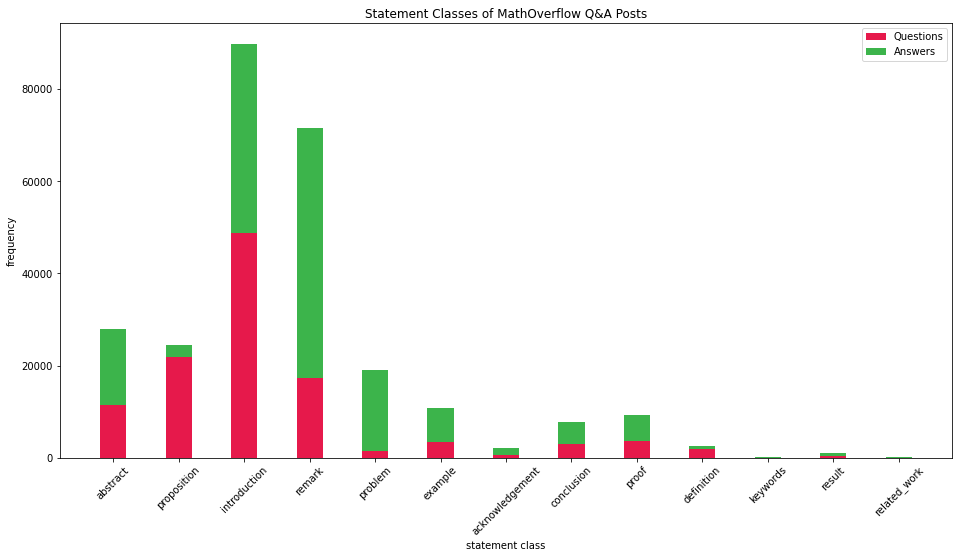

In [293]:
bar_chart_subfigs([q_label_summary,a_label_summary],["Questions","Answers"],
                  "statement class","frequency","Statement Classes of MathOverflow Q&A Posts")

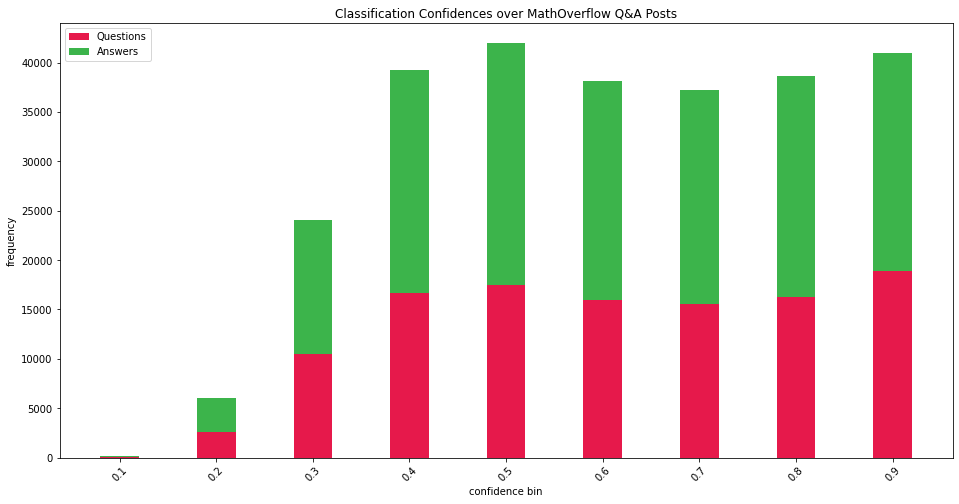

In [294]:
bar_chart_subfigs([q_confidence_summary,a_confidence_summary],["Questions","Answers"],
                  'confidence bin','frequency', 'Classification Confidences over MathOverflow Q&A Posts')

# Breakdown By Score

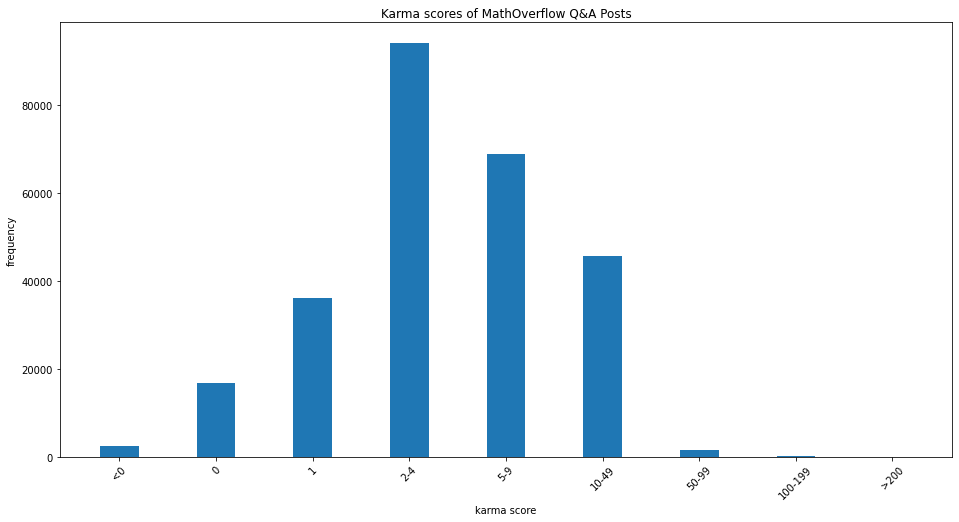

In [295]:
score_summary_with_legend = {}
for index,legend_item in enumerate(score_bin_legend):
    score_summary_with_legend[legend_item] = score_summary[index]
bar_chart(score_summary_with_legend,'karma score','frequency','Karma scores of MathOverflow Q&A Posts')

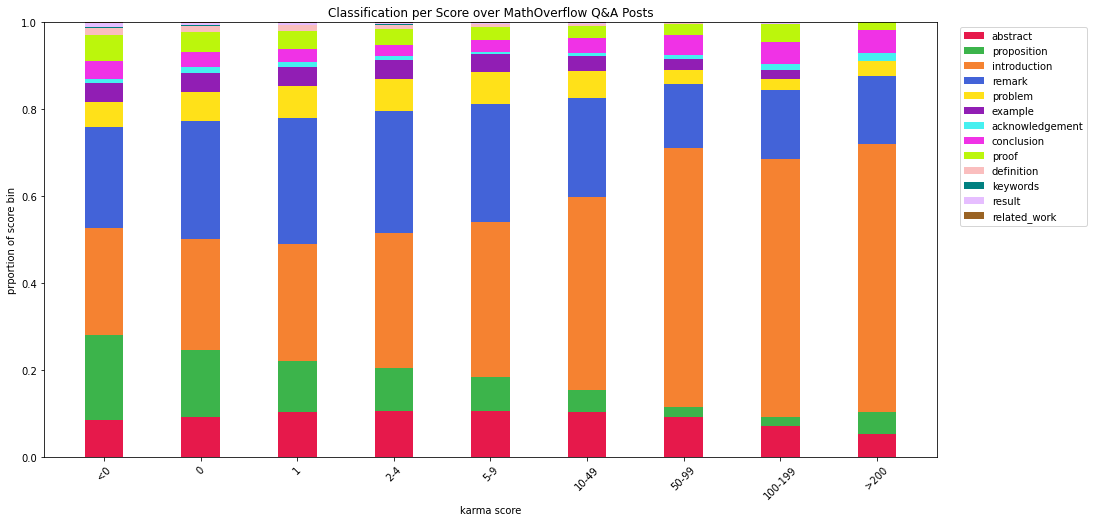

In [296]:
# We'd like to get a feeling if the ratio of the detected "statement classes" changes as the scores go up/down
# for that we'll take each bin, normalize each class to a ratio of the total mass of the bin, 
# and plot them next to each other
normalized_score_breakdown = deepcopy(score_label_breakdown)
score_totals_lookup = {v: score_summary[idx]for idx,v in enumerate(score_bin_legend)}

for label, score_dict in normalized_score_breakdown.items():
    for this_bin, v in score_dict.items():
        score_dict[this_bin] = float(v) / score_totals_lookup[this_bin]

bar_chart_subfigs(list(normalized_score_breakdown.values()), normalized_score_breakdown.keys(),
                 "karma score", "prportion of score bin", "Classification per Score over MathOverflow Q&A Posts", 
                  increment_colors=False, legend_outside=True)